<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/10_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10.6 Kalman Filtering
The Kalman filter is frequently used tool in hydrology, which tries to get the optimal solution of the problem given the variance of the model and observation error. The system which Kalman discrete filter tries to optimize is given by following equations:

$x_{k+1} = A x_k + B u_k + w$,

where, the measurements are given by,

$y_{k+1} = H x_{k+1} + v$

The random variable $w$ and $v$ are the process and measurement noise respectively, and their variance is $Q$ and $R$ respectively.

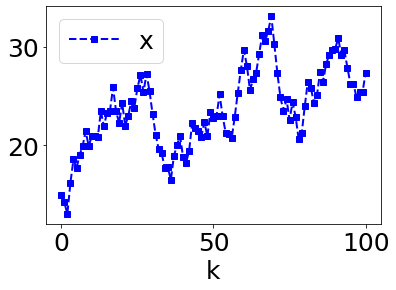

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# change the default parameters of the plot
params = {'font.size': 25}
plt.rcParams.update(params)

n = 100
# generate true signal
A = 0.9
B = 0.5
u = 10*np.random.rand(n)
H = 1.0
x_true = np.empty(n+1)
x_true[0] = 15.0 #initial condition
for k in range(n):
  x_true[k+1] = A*x_true[k]+ B*u[k]

plt.plot(x_true, '--bs', label='x', lw=2)
plt.xlabel('k')
plt.legend(loc='best')
plt.show()

Let us add some noise into our signal.

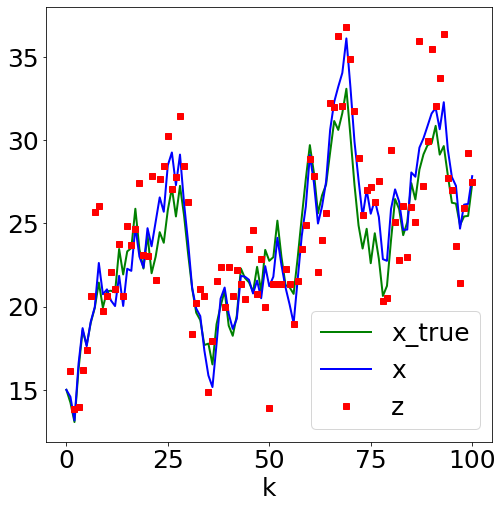

In [11]:
# generate signal with noise
Q = 0.5
R = 5
x = np.empty(n+1)
x[0] = x_true[0]
z = np.empty(n+1)
z[0] = np.nan

for k in range(n):
  # time equation
  w = np.sqrt(Q)*np.random.randn(1)
  x[k+1] = A*x[k]+ B*u[k] + w
  
  # measurment equation
  v = np.sqrt(R)*np.random.randn(1)
  z[k+1] = H*x[k+1] + v

plt.figure(figsize=(8, 8))
plt.plot(x_true, 'g', label='x_true', lw=2)
plt.plot(x, 'b', label='x', lw=2)
plt.plot(z, 'rs', label='z', lw=2)
plt.xlabel('k')
plt.legend(loc='best')
plt.show()

Now let us use Kalman filter to improve the estimate provided by the model with the help of observations.

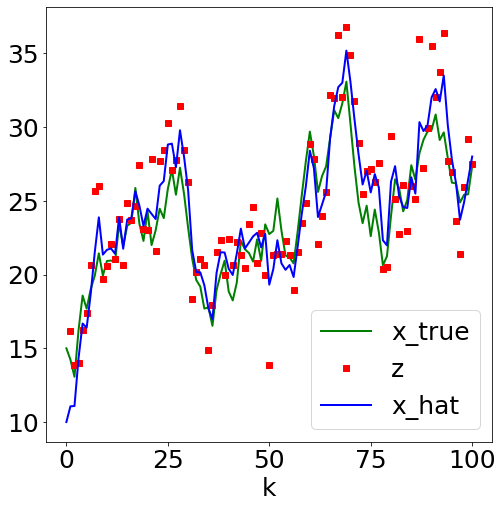

In [12]:
#################### kalman filter #################
x_hat = np.empty(n+1)
x_hat_minus = np.empty(n+1)
P_minus = np.empty(n+1)
kalman_gain = np.empty(n+1)
P = np.empty(n+1)
kalman_gain[0] = np.nan
P[0] = np.nan
# initial guess
x_hat[0] = 10.0
P_minus[0] = 1.0

for k in range(n):
  # time update
  x_hat_minus[k+1] = A*x_hat[k] + B*u[k]
  P_minus[k+1] = A*P_minus[k]*A + Q
  
  # measurment update
  kalman_gain[k+1] = P_minus[k+1]*H/(H*P_minus[k+1]*H+R)
  x_hat[k+1] = x_hat_minus[k+1] + kalman_gain[k+1]*(z[k+1]-H*x_hat_minus[k+1])
  P[k+1] = P_minus[k+1] - kalman_gain[k+1]*(H*P_minus[k+1]*H+R)*kalman_gain[k+1]

plt.figure(figsize=(8, 8))
plt.plot(x_true, 'g', label='x_true', lw=2)
plt.plot(z, 'rs', label='z', lw=2)
plt.plot(x_hat, 'b', label='x_hat', lw=2)
plt.xlabel('k')
plt.legend(loc='best')
plt.show()


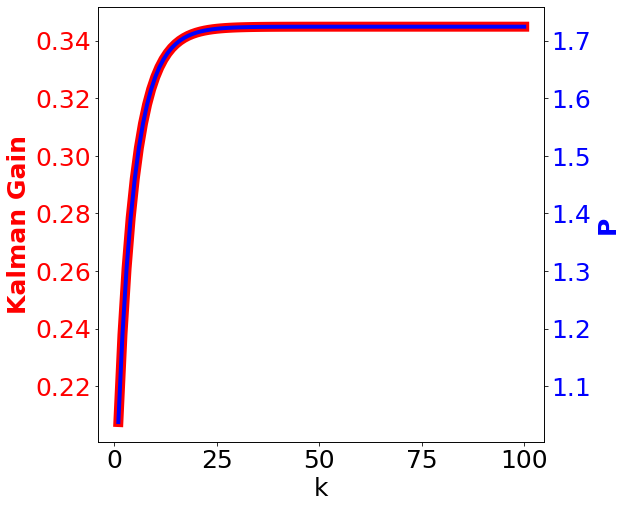

In [13]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.plot(kalman_gain, 'r', label='Kalman Gain', lw=10)
ax1.set_xlabel('k')
ax1.set_ylabel('Kalman Gain', color='r', weight='bold') 
  
for tl in ax1.get_yticklabels():
  tl.set_color('r')
  
ax2 = ax1.twinx()
ax2.plot(P, 'b', label='P', lw=4)
ax2.set_ylabel('P', color='b', weight='bold') 
  
for tl in ax2.get_yticklabels():
  tl.set_color('b')